Today is a good day
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
positive_negative
Positive    44
Negative    12
Name: count, dtype: int64
    slno                                               text  \
0      1   a fun adventure. Perfect facilities available...   
1      2   As an extended family  we went for a two nigh...   
2      3   Booked this hotel for the 3rd time in 4 years...   
3      4   Came here for short break. The stay was quite...   
4      5   Check in process was quick and smooth  with f...   
5      6   Check-in was done within a reasonable time. D...   
6      7   Decided to try this hotel out as a change to ...   
7      8   Entered the spacious and clean lobby  it was ...   
9     10   Hotel is decent with amenities in place. Not ...   
12    13   I like this hotel very much compare to other ...   
13    14   i liked the hotel ambiance and the lightings ...   
14    15   I reserved the stay 10 days before arrival. A...   
18    19   My friend and I

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shaarukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


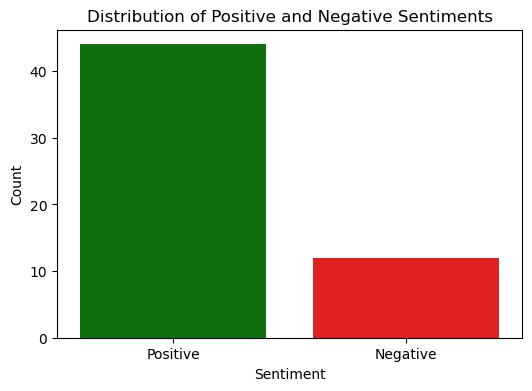

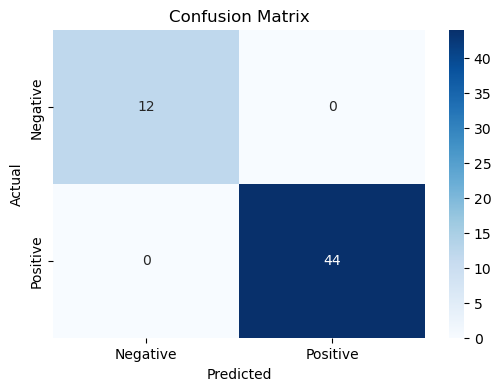

In [5]:
## Load the data
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix

# Download necessary NLTK data
nltk.download("vader_lexicon")

# Load dataset
df = pd.read_csv("customer_reviews.csv")

# Initialize sentiment analyzer
senti_analysis = SentimentIntensityAnalyzer()

# Check sentiment of the first feedback
print(df.iloc[55, 1])
print(senti_analysis.polarity_scores(df.iloc[55, 1]))

# Check the sentiment of text
df["score"] = df["text"].apply(lambda x: senti_analysis.polarity_scores(x))

# Extract compound score
df["compound_score"] = df["score"].apply(lambda x: x["compound"])

# Assign sentiment labels
df["positive_negative"] = df["compound_score"].apply(lambda x: np.where(x > 0, "Positive", "Negative"))

# Count of negative and positive feedback
sentiment_counts = df["positive_negative"].value_counts()
print(sentiment_counts)

# Filtering positive feedback
positive_data = df.query("positive_negative=='Positive'")
print(positive_data)

# Visualizing sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green","red"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Positive and Negative Sentiments")
plt.show()

# Generate confusion matrix
y_true = df["positive_negative"].map({"Positive": 1, "Negative": 0})
y_pred = df["compound_score"].apply(lambda x: 1 if x > 0 else 0)
cm = confusion_matrix(y_true, y_pred)

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
